# Simple Linear Regression

In this notebook, we'll build a linear regression model to predict `Sales` using an appropriate predictor variable.

## Step 1: Reading and Understanding the Data

Let's start with the following steps:

1. Importing data using the pandas library
2. Understanding the structure of the data

In [1]:
# Supress Warnings
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Import the numpy and pandas package
import numpy as np
import pandas as pd

In [4]:
# Read the given CSV file, and view some sample records

advertising = pd.read_csv("advertising.csv")
advertising.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9


Let's inspect the various aspects of our dataframe

In [5]:
advertising.shape

(200, 4)

In [8]:
advertising.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.3 KB


In [9]:
advertising.describe().T

,count,mean,std,min,25%,50%,75%,max
TV,200.0,147.0425,85.854236,0.7,74.375,149.75,218.825,296.4
Radio,200.0,23.2640,14.846809,0.0,9.975,22.90,36.525,49.6
Newspaper,200.0,30.5540,21.778621,0.3,12.750,25.75,45.100,114.0
Sales,200.0,15.1305,5.283892,1.6,11.000,16.00,19.050,27.0


## Step 2: Visualising the Data

Let's now visualise our data using seaborn. We'll first make a pairplot of all the variables present to visualise which variables are most correlated to `Sales`.

In [10]:
import matplotlib.pyplot as plt 
import seaborn as sns

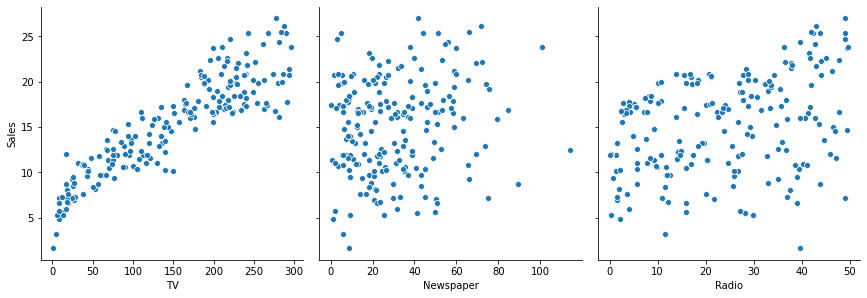

In [11]:
# to get an idea which features vary linearly with the target variable
sns.pairplot(advertising, x_vars=['TV', 'Newspaper', 'Radio'], y_vars='Sales',size=4, aspect=1, kind='scatter')
plt.show()

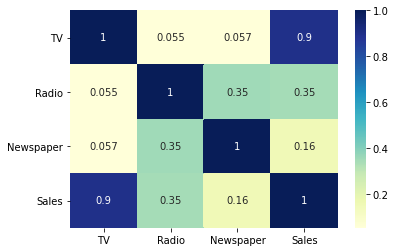

In [12]:
# High value of correlation (closer to -1 or +1) gives the linearity measure between two variables

sns.heatmap(advertising.corr(), cmap="YlGnBu", annot = True)
plt.show()

As is visible from the pairplot and the heatmap, the variable `TV` seems to be most correlated with `Sales`. So let's go ahead and perform simple linear regression using `TV` as our feature variable.

---
## Step 3: Performing Simple Linear Regression

Equation of linear regression<br>
$y = c + m_1x_1 + m_2x_2 + ... + m_nx_n$

-  $y$ is the response
-  $c$ is the intercept
-  $m_1$ is the coefficient for the first feature
-  $m_n$ is the coefficient for the nth feature<br>

In our case:

$y = c + m_1 \times TV$

The $m$ values are called the model **coefficients** or **model parameters**.

---

### Generic Steps in model building using `statsmodels`

We first assign the feature variable, `TV`, in this case, to the variable `X` and the response variable, `Sales`, to the variable `y`.

In [13]:
X = advertising['TV']
y = advertising['Sales']

#### Train-Test Split

You now need to split our variable into training and testing sets. You'll perform this by importing `train_test_split` from the `sklearn.model_selection` library. It is usually a good practice to keep 70% of the data in your train dataset and the rest 30% in your test dataset

In [14]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.7, test_size = 0.3, random_state = 100)

In [17]:
# Let's now take a look at the train dataset
print(X_train.shape)
X_train.head()


(140,)


74     213.4
3      151.5
185    205.0
26     142.9
90     134.3
Name: TV, dtype: float64

In [18]:
y_train.shape
y_train.head()

74     17.0
3      16.5
185    22.6
26     15.0
90     14.0
Name: Sales, dtype: float64

#### Building a Linear Model

You first need to import the `statsmodel.api` library using which you'll perform the linear regression.

In [19]:
import statsmodels.api as sm

By default, the `statsmodels` library fits a line on the dataset which passes through the origin ie it omits the intercept(c) in the y=m*x+c equation. But in order to have an intercept, you need to manually use the `add_constant` attribute of `statsmodels`. And once you've added the constant to your `X_train` dataset, you can go ahead and fit a regression line using the `OLS` (Ordinary Least Squares) attribute of `statsmodels` as shown below

In [20]:
# to add a constant to get an intercept
X_train_sm = sm.add_constant(X_train)
X_train_sm.head()


,const,TV
74,1.0,213.4
3,1.0,151.5
185,1.0,205.0
26,1.0,142.9
90,1.0,134.3


In [21]:
# Fit the resgression line using 'OLS'(Ordinary Least Squares)
# Training the model
lr = sm.OLS(y_train, X_train_sm).fit()

In [22]:
# Print the parameters, i.e. the intercept and the slope of the regression line fitted
lr.params         # Sales= 6.948683+ 0.054546*TV

const    6.948683
TV       0.054546
dtype: float64

In [23]:
# Performing a summary operation lists out all the different parameters of the regression line fitted
print(lr.summary())

                            OLS Regression Results                            
Dep. Variable:                  Sales   R-squared:                       0.816
Model:                            OLS   Adj. R-squared:                  0.814
Method:                 Least Squares   F-statistic:                     611.2
Date:                Sun, 26 Jul 2020   Prob (F-statistic):           1.52e-52
Time:                        12:35:14   Log-Likelihood:                -321.12
No. Observations:                 140   AIC:                             646.2
Df Residuals:                     138   BIC:                             652.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          6.9487      0.385     18.068      0.0

####  Looking at some key statistics from the summary

The values we are concerned with are - 
1. The coefficients and significance (p-values)
2. R-squared
3. F statistic and its significance

##### 1. The coefficient for TV is 0.054, with a very low p value
The coefficient is statistically significant. So the association is not purely by chance. 
The p-values of the coefficients (in this case just one coefficient for TV) tell you whether the coefficient is significant or not. In this case, the coefficient of TV came out to be 0.0545 with a standard error of about 0.002. Thus, you got a t-value of 24.722 which lead to a practically zero p-value. Hence, you can say that your coefficient is indeed significant. 

##### 2. R - squared is 0.816
Meaning that 81.6% of the variance in `Sales` is explained by `TV`

This is a decent R-squared value.

###### 3. F statistic has a very low p value (practically low)
Meaning that the model fit is statistically significant, and the explained variance isn't purely by chance.
The heuristic is similar to what you learnt in the normal p-value calculation as well. If the 'Prob (F-statistic)' is less than 0.05, you can conclude that the overall model fit is significant. If it is greater than 0.05, you might need to review your model as the fit might be by chance, i.e. the line may have just luckily fit the data. In the image above, you can see that the p-value of the F-statistic is 1.52e-52  which is practically a zero value. This means that the model for which this was calculated is definitely significant since it is less than 0.05.

---
The fit is significant. Let's visualize how well the model fit the data.

From the parameters that we get, our linear regression equation becomes:

$ Sales = 6.948 + 0.054 \times TV $

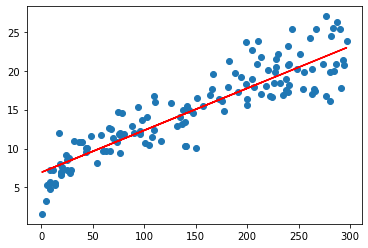

In [24]:
plt.scatter(X_train, y_train)
plt.plot(X_train, 6.948 + 0.054*X_train, 'r')
plt.show()

## Step 4: Residual analysis 
To validate assumptions of the model, and hence the reliability for inference

#### Distribution of the error terms
We need to check if the error terms are also normally distributed (which is infact, one of the major assumptions of linear regression), let us plot the histogram of the error terms and see what it looks like.

In [25]:
y_train_pred = lr.predict(X_train_sm)
res = (y_train - y_train_pred)

##### Error terms are normally distributed

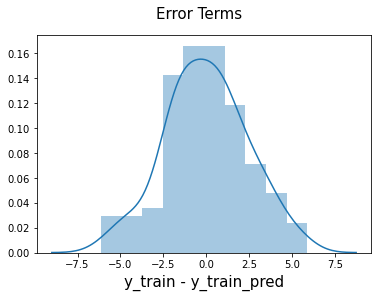

In [27]:
fig = plt.figure()
sns.distplot(res, bins = 10)
fig.suptitle('Error Terms', fontsize = 15)                  # Plot heading 
plt.xlabel('y_train - y_train_pred', fontsize = 15)         # X-label
plt.show()

The residuals are following the normally distributed with a mean 0. All good!

##### Residual Patterns

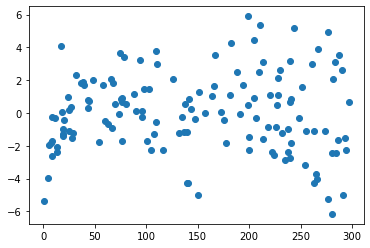

In [28]:
plt.scatter(X_train,res)
plt.show()

We are confident that the model fit isn't by chance, and has decent predictive power. The normality of residual terms allows some inference on the coefficients.

Although, the variance of residuals increasing with X indicates that there is significant variation that this model is unable to explain.

As you can see, the regression line is a pretty good fit to the data

## Step 5: Predictions on the Test Set

Now that you have fitted a regression line on your train dataset, it's time to make some predictions on the test data. For this, you first need to add a constant to the `X_test` data like you did for `X_train` and then you can simply go on and predict the y values corresponding to `X_test` using the `predict` attribute of the fitted regression line.

In [29]:
# Add a constant to X_test
X_test_sm = sm.add_constant(X_test)

# Predict the y values corresponding to X_test_sm
y_pred = lr.predict(X_test_sm)

In [30]:
y_pred.head()

126     7.374140
104    19.941482
99     14.323269
92     18.823294
111    20.132392
dtype: float64

In [31]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

##### Looking at the RMSE

In [32]:
#Returns the mean squared error; we'll take a square root
np.sqrt(mean_squared_error(y_test, y_pred))

2.0192960089662324

###### Checking the R-squared on the test set

In [33]:
r_squared = r2_score(y_test, y_pred)
r_squared

0.7921031601245659

##### Visualizing the fit on the test set

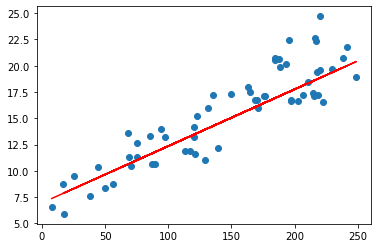

In [51]:
plt.scatter(X_test, y_test)
plt.plot(X_test, 6.948 + 0.054 * X_test, 'r')
plt.show()

### Linear Regression using `linear_model` in `sklearn`

Apart from `statsmodels`, there is another package namely `sklearn` that can be used to perform linear regression. We will use the `linear_model` library from `sklearn` to build the model. Since, we hae already performed a train-test split, we don't need to do it again.

There's one small step that we need to add, though. When there's only a single feature, we need to add an additional column in order for the linear regression fit to be performed successfully.

In [56]:
from sklearn.model_selection import train_test_split
X_train_lm, X_test_lm, y_train_lm, y_test_lm = train_test_split(X, y, train_size = 0.7, test_size = 0.3, random_state = 100)

In [53]:
X_train_lm.shape

(140,)

In [57]:
# Reshaping as scikit learn wants us to pass a 2-d array and not an 1-d array
X_train_lm = X_train_lm.values.reshape(-1,1)
X_test_lm = X_test_lm.values.reshape(-1,1)
X_train_lm

array([[213.4],
       [151.5],
       [205. ],
       [142.9],
       [134.3],
       [ 80.2],
       [239.8],
       [ 88.3],
       [ 19.4],
       [225.8],
       [136.2],
       [ 25.1],
       [ 38. ],
       [172.5],
       [109.8],
       [240.1],
       [232.1],
       [ 66.1],
       [218.4],
       [234.5],
       [ 23.8],
       [ 67.8],
       [296.4],
       [141.3],
       [175.1],
       [220.5],
       [ 76.4],
       [253.8],
       [191.1],
       [287.6],
       [100.4],
       [228. ],
       [125.7],
       [ 74.7],
       [ 57.5],
       [262.7],
       [262.9],
       [237.4],
       [227.2],
       [199.8],
       [228.3],
       [290.7],
       [276.9],
       [199.8],
       [239.3],
       [ 73.4],
       [284.3],
       [147.3],
       [224. ],
       [198.9],
       [276.7],
       [ 13.2],
       [ 11.7],
       [280.2],
       [ 39.5],
       [265.6],
       [ 27.5],
       [280.7],
       [ 78.2],
       [163.3],
       [213.5],
       [293.6],
       [

In [43]:
print(X_train_lm.shape)
print(y_train_lm.shape)
print(X_test_lm.shape)
print(y_test_lm.shape)

(140, 1)
(140,)
(60, 1)
(60,)


In [44]:
from sklearn.linear_model import LinearRegression

# Representing LinearRegression as lr(Creating LinearRegression Object)
lm = LinearRegression()

# Fit the model using lr.fit()
lm.fit(X_train_lm, y_train_lm)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [45]:
print(lm.intercept_)
print(lm.coef_)

6.94868320000136
[0.05454575]


The equationwe get is the same as what we got before!

$ Sales = 6.948 + 0.054* TV $

Sklearn linear model is useful as it is compatible with a lot of sklearn utilites (cross validation, grid search etc.)

### Q. compute the value of sales when the value of TV is 175.5

In [65]:
X=[[175.5]]
sales=lm.predict(X)
sales

array([16.52146284])

---
## Addressing some common questions/doubts on Simple Linear Regression
---

### Q: Why is it called 'R-squared'?

Based on what we learnt so far, do you see it? Can you answer this?
 
 
 
 
 
 



.
 
  #### Drumroll...
  
.
As the value of the square of Pearson's correlation is is same as R so its called R-squared


In [34]:
corrs = np.corrcoef(X_train, y_train)
print(corrs)

[[1.         0.90321277]
 [0.90321277 1.        ]]


In [35]:
corrs[0,1] ** 2

0.8157933136480384

Correlation (Pearson) is also called **"r"** or **"Pearson's R"**

### Q: What is a good RMSE? Is there some RMSE that I should aim for?

<br>

<br>

You should be able to answer this by now!


<br>


<br>



Look at "Sharma ji ka beta"; he could answer this in a moment. How lucky is Sharma ji to have such a smart kid!

.

.
 
.

.
 
  #### Drumroll...
  
.
 
.

.

.

The RMSE:
 - depends on the units of the Y variables
 - is NOT a normalized measure
 
While it can't really tell you of the gooodness of the particular model, it can help you compare models. 

A better measure is R squared, which is normalized.

<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>

### Q: Does scaling have an impact on the model? When should I scale?

<br>
<br>
<br>
<br>
<br>
<br>

While the true benefits of scaling will be apparent during future modules, at this juncture we can discuss if it has an impact on the model.

We'll rebuild the model after scaling the predictor and see what changes.

The most popular methods for scaling:
1. Min-Max Scaling
2. Standard Scaling

In [36]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.7, test_size = 0.3, random_state = 100)

#### SciKit Learn has these scaling utilities handy

In [37]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler

In [38]:
# One aspect that you need to take care of is that the 'fit_transform' can be performed on 2D arrays only. So you need to
# reshape your 'X_train_scaled' and 'y_trained_scaled' data in order to perform the standardisation.
X_train_scaled = X_train.reshape(-1,1)
y_train_scaled = y_train.reshape(-1,1)

In [39]:
X_train_scaled.shape

(140, 1)

In [40]:
# Create a scaler object using StandardScaler()
scaler = StandardScaler()
#'Fit' and transform the train set; and transform using the fit on the test set later
X_train_scaled = scaler.fit_transform(X_train_scaled)
y_train_scaled = scaler.fit_transform(y_train_scaled)

In [41]:
print("mean and sd for X_train_scaled:", np.mean(X_train_scaled), np.std(X_train_scaled))
print("mean and sd for y_train_scaled:", np.mean(y_train_scaled), np.std(y_train_scaled))

mean and sd for X_train_scaled: 2.5376526277146434e-17 0.9999999999999999
mean and sd for y_train_scaled: -2.5376526277146434e-16 1.0


In [42]:
# Let's fit the regression line following exactly the same steps as done before
X_train_scaled = sm.add_constant(X_train_scaled)

lr_scaled = sm.OLS(y_train_scaled, X_train_scaled).fit()

In [43]:
# Check the parameters
lr_scaled.params

array([-2.91433544e-16,  9.03212773e-01])

As you might notice, the value of the parameters have changed since we have changed the scale.

Let's look at the statistics of the model, to see if any other aspect of the model has changed.

In [44]:
print(lr_scaled.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.816
Model:                            OLS   Adj. R-squared:                  0.814
Method:                 Least Squares   F-statistic:                     611.2
Date:                Thu, 13 Sep 2018   Prob (F-statistic):           1.52e-52
Time:                        22:39:46   Log-Likelihood:                -80.233
No. Observations:                 140   AIC:                             164.5
Df Residuals:                     138   BIC:                             170.3
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -2.914e-16      0.037  -7.98e-15      1.0

#### Model statistics and goodness of fit remain unchanged.

##### So why scale at all?
- Helps with interpretation (we'll be able to appreciate this better in later modules)
- Faster convergence of gradient descent

## Q.Assumptions of Simple Linear Regression

**1. There is a linear relationship between X and Y:**
    <br>
X and Y should display some sort of a linear relationship; otherwise, there is no use of fitting a linear model between them.<br>
**2.Error terms are normally distributed with mean zero(not X, Y):**

    .There is no problem if the error terms are not normally distributed if you just wish to fit a line and not make any further interpretations.
    .But if you are willing to make some inferences on the model that you have built (you will see this in the coming segments), you need to have a notion of the distribution of the error terms. One particular repercussion of the error terms not being normally distributed is that the p-values obtained during the hypothesis test to determine the significance of the coefficients become unreliable
    .The assumption of normality is made, as it has been observed that the error terms generally follow a normal distribution with mean equal to zero in most cases.
    
**3.Error terms are independent of each other:**<br>
The error terms should not be dependent on one another (like in a time-series data wherein the next value is dependent on the previous one).
<br>
<img src="http://reliawiki.org/images/e/ee/Doe4.13.png" alt="Independent nature of error terms" width="500" height="600">

**4.Error terms have constant variance (homoscedasticity):**<br>
.The variance should not increase (or decrease) as the error values change.<br>
.Also, the variance should not follow any pattern as the error terms change.
<br>
<img src="http://reliawiki.org/images/e/e3/Doe4.17.png" alt="homoscedasticity" width="500" height="600">

<br>
For more : "http://reliawiki.org/index.php/Simple_Linear_Regression_Analysis"

## Q.Hypothesis Testing in Linear Regression

Before you move on to the model building part, there is still one theoretical aspect left to be addressed - the significance of the derived beta coefficient. When you fit a straight line through the data, you'll obviously get the two parameters of the straight line, i.e. the intercept (
β0) and the slope (β1). Now, while β0 is not of much importance right now, but there are a few aspects surrounding β1
which need to be checked and verified.
<br>
The first question we ask is, "Is the beta coefficient significant?" What does this mean?
<br>
 Suppose you have a dataset for which the scatter plot looks like the following:
<br> <img src="https://images.upgrad.com/4548a374-4fe7-4016-86a1-5bcf92a08e21-20190110122767.jpg" width="250" height="300"><br>
Now, if you run a linear regression on this dataset in Python, Python will fit a line on the data which, say, looks like the following:
<img src="https://images.upgrad.com/619da79f-5a07-49ee-acef-3f91ab74cf41-20190110122837.jpg" width="250" height="300"><br>
Now, you can clearly see that the data in randomly scattered and doesn't seem to follow a linear trend or any trend, in general. But Python will anyway fit a line through the data using the least squared method. But you can see that the fitted line is of no use in this case. 
<br>
Hence, every time you perform a linear regression, you need to test whether the fitted line is a significant one or not or to simply put it, you need to test whether 
β1 is significant or not. And in comes the idea of Hypothesis Testing on β1
<br>
You start by saying that β1 is not significant, i.e. there is no relationship between X and y.
<br>So in order to perform the hypothesis test, we first propose the null hypothesis that β1 is 0.
<br>And the alternative hypothesis thus becomes β1 is not zero.

**1.Null Hypothesis (H0): β1=0**<br>
**Alternate Hypothesis (HA): β1≠0**
<br>


Let's first discuss the implications of this hypothesis test. If you fail to reject the null hypothesis that would mean that β1 is zero which would simply mean that β1 is insignificant and of no use in the model. Similarly, if you reject the null hypothesis, it would mean that β1 is not zero and the line fitted is a significant one.<br>
Now, how do you perform the hypothesis test? You first used to compute the **t-score** (which is very similar to the Z-score) which is given by :<br>
**X−μs/√n ,where μ is the population mean and s is the sample standard deviation which when divided by √n is also known as standard error.**
<br>
Using this, the t-score for ^β1 comes out to be (since the null hypothesis is that β1 is equal to zero):<br>
**^β1−0/SE(^β1)**
<br>
Now, in order to perform the hypothesis test, you need to derive the p-value for the given beta. 
<br>
For More: https://www.youtube.com/watch?v=78YNvrsRzVw&t=269s

## Summary Statistics
<br>
<img src="https://cdn.upgrad.com/UpGrad/temp/7cf275c7-2959-459d-963d-fbd8712af85a/Untitled.png">

**p-value**<br>
It tells us that how confident the ML model is about the significance of the coefficient(β1)<br>
Low value of p tells us that the co-efficients are statistically signifiicant the the model that is built is not by any arbitary chance and the coefficients does hold meaning to its existance 
<br>**R2-Value**<br>
Tells what % of variance is explainable by the ML regression model.
<br>**F-Statistics**<br>
You were introduced to a new term named F-statistic and Prob(F-statistic). Now, recall that in the last segment, you did a hypothesis test for beta to determine whether or not the coefficient β1 outputted by the model was significant or not. Now, F-statistic is similar in the sense that now instead of testing the significance of each of the betas, it tells you whether the overall model fit is significant or not. This parameter is examined because many a time it happens that even though all of your betas are significant, but your overall model fit might happen just by chance.<br>
**If the 'Prob (F-statistic)' is less than 0.05, you can conclude that the overall model fit is significant. If it is greater than 0.05, you might need to review your model as the fit might be by chance, i.e. the line may have just luckily fit the data**. 
<br>In the image above, you can see that the p-value of the F-statistic is 1.52e-52  which is practically a zero value. This means that the model for which this was calculated is definitely significant since it is less than 0.05.